In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf()
sc= SparkContext(conf=conf)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
from IPython.display import IFrame
import pyspark.sql.functions as sf

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly_express as px
%matplotlib inline

In [ ]:
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
books_data = pd.read_csv('goodbook10k/books.csv',error_bad_lines = False)
tags_data = pd.read_csv('goodbook10k/book_tags.csv')
ratings_data = pd.read_csv('goodbook10k/ratings.csv')
book_tags = pd.read_csv('goodbook10k/tags.csv')

In [ ]:
books_data.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
tags_data.head(5)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
ratings_data.head(5)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
book_tags.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
top_rated = books_data.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[5:15]

fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()

In [ ]:
fig = px.treemap(tf_top_rated, path=['original_title'], values='average_rating',title='Top Rated Books', width=750, height=500)
fig.show()

In [ ]:
top_popular = books_data.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
fig = px.bar(fifty_top_popular, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()

In [ ]:
fig = px.treemap(fifty_top_popular, path=['original_title'], values='ratings_count',title='Popular Books', width=1000, height=700)
fig.show()

In [ ]:
fifty_top_authors = top_rated[:50]
fig = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig.show()

In [ ]:
top_author_counts = books_data['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

In [ ]:
stop_words=set(STOPWORDS)
author_string = " ".join(books_data['authors'][:50])
title_string = " ".join(books_data['original_title'][:50])

In [ ]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

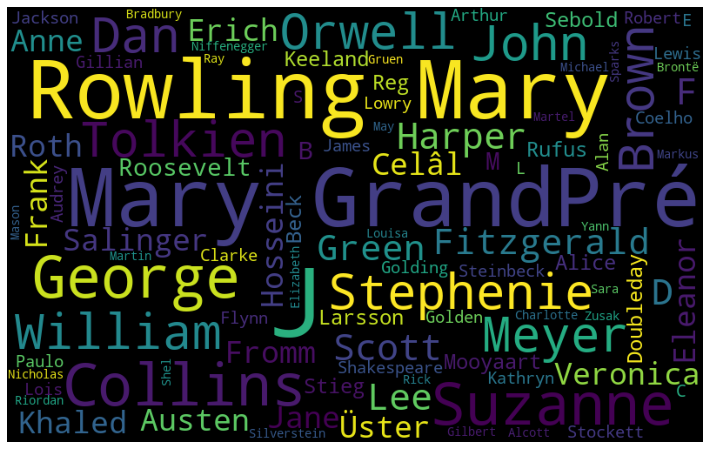

In [ ]:
wordcloud(author_string)

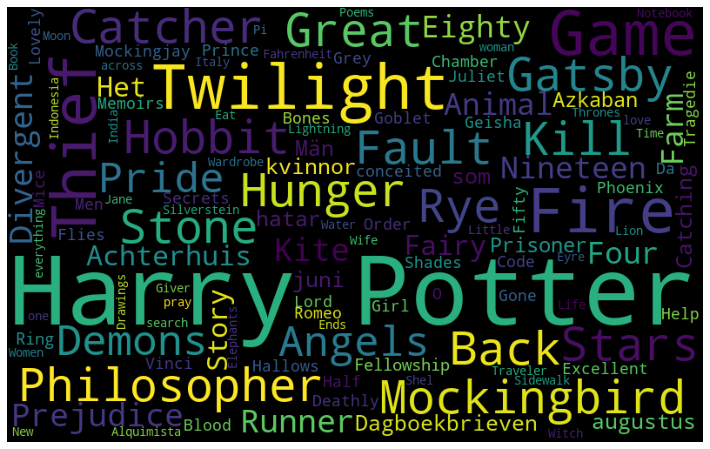

In [ ]:
wordcloud(title_string)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
spark = SparkSession.builder.getOrCreate()
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
rating_df= spark.read.option("header","true").option("inferSchema","true").format("csv").load("goodbook10k/ratings.csv")


In [ ]:
rating_df.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [ ]:
rating_df.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [ ]:
books_df= spark.read.option("header","true").option("inferSchema","true").format("csv").load("goodbook10k/books.csv")

In [ ]:
books_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [ ]:
books_df.show(1)

+---+-------+------------+-------+-----------+---------+----------------+---------------+-------------------------+----------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id|book_id|best_book_id|work_id|books_count|     isbn|          isbn13|        authors|original_publication_year|  original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+-------+------------+-------+-----------+---------+----------------+---------------+-------------------------+----------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
|  1

In [ ]:
traning_df,validation_df = rating_df.randomSplit([.7,.3])

In [ ]:
iteration = 10
regularization_parameter = 0.1
rank = 4
errors = []
err = 0


In [ ]:
als = ALS(maxIter = iteration, regParam =regularization_parameter,rank = 4, userCol="user_id", itemCol="book_id",ratingCol = "rating", coldStartStrategy="drop")

In [ ]:
model =  als.fit(traning_df)

In [ ]:
prediction = model.transform(validation_df)

In [ ]:
evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="rating")

In [ ]:
mae = evaluator.evaluate(prediction)

In [ ]:
print('The Mean Absolute Error is %.3f' % (mae))

The Mean Absolute Error is 0.907


In [ ]:
ls = ALS(maxIter = iteration, regParam =regularization_parameter,rank = 4, userCol="user_id", itemCol="book_id",ratingCol = "rating", coldStartStrategy="drop")

In [ ]:
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(als.rank, [10, 50, 200]) \
    .addGrid(als.regParam, [1, 0.1, 0.01]) \
    .addGrid(als.maxIter, [10, 50, 200]) \
    .build()

In [ ]:
evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="rating")

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
crossvall = CrossValidator(estimator=ls,
                          estimatorParamMaps=paramGrid,
                          evaluator = evaluator,
                          numFolds=5)

In [ ]:
cvModel =  crossvall.fit(traning_df)

In [ ]:
prediction = cvModel.transform(validation_df)

In [ ]:
prediction.show(n = 10)

+-------+-------+------+----------+
|book_id|user_id|rating|prediction|
+-------+-------+------+----------+
|    148|  35982|     3| 3.2271628|
|    148|  12466|     4| 3.0052807|
|    148|  22164|     3| 3.3488452|
|    148|  10140|     3| 2.7888708|
|    148|  27834|     3| 3.8560085|
|    148|  20967|     3|  3.961702|
|    148|  10610|     4|  3.895416|
|    148|  14603|     4| 3.4389927|
|    148|  15547|     4| 2.9142065|
|    148|  33065|     3|  3.425545|
+-------+-------+------+----------+
only showing top 10 rows



In [ ]:
#Extract best model from the cv model above
best_model = cvModel.bestModel


In [ ]:
# Print best_model
print(type(best_model))

<class 'pyspark.ml.recommendation.ALSModel'>


In [ ]:
best_model = model

In [ ]:
prediction = best_model.transform(validation_df)

In [ ]:
# View the predictions 
prediction.show(n = 10)

# Calculate and print the RMSE of test_predictions
print ("RMSE: ", evaluator.evaluate(prediction))

+-------+-------+------+----------+
|book_id|user_id|rating|prediction|
+-------+-------+------+----------+
|    148|  35982|     3| 3.2271628|
|    148|  12466|     4| 3.0052807|
|    148|  22164|     3| 3.3488452|
|    148|  10140|     3| 2.7888708|
|    148|  27834|     3| 3.8560085|
|    148|  20967|     3|  3.961702|
|    148|  10610|     4|  3.895416|
|    148|  14603|     4| 3.4389927|
|    148|  15547|     4| 2.9142065|
|    148|  33065|     3|  3.425545|
+-------+-------+------+----------+
only showing top 10 rows

RMSE:  0.9070028826974941


In [ ]:
bookRecoments = model.recommendForAllUsers(5)

In [ ]:
bookRecoments.printSchema()

root
 |-- user_id: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- book_id: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)



In [ ]:
# Temporary table
bookRecoments.registerTempTable("ALS_recs_temp")

In [ ]:
bookRecoments.show(n =5)

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|    148|[[3491, 4.481204]...|
|    463|[[1935, 4.873303]...|
|    471|[[9842, 4.212896]...|
|    496|[[8323, 5.591382]...|
|    833|[[3491, 4.733633]...|
+-------+--------------------+
only showing top 5 rows



In [ ]:
clean_recs = spark.sql("""SELECT user_id,
                            movieIds_and_ratings.book_id AS book_id,
                            movieIds_and_ratings.rating AS prediction
                        FROM ALS_recs_temp
                        LATERAL VIEW explode(recommendations) exploded_table
                            AS movieIds_and_ratings""")
clean_recs.show()

+-------+-------+----------+
|user_id|book_id|prediction|
+-------+-------+----------+
|    148|   3491|  4.481204|
|    148|   3885|  4.436405|
|    148|   6920| 4.4123197|
|    148|   6862|  4.394534|
|    148|   4868| 4.3849387|
|    463|   1935|  4.873303|
|    463|   3482| 4.8720655|
|    463|   3124| 4.8465276|
|    463|   9024|   4.77955|
|    463|   5175|  4.738883|
|    471|   9842|  4.212896|
|    471|   9569| 4.1090803|
|    471|   8013| 4.1019125|
|    471|   8362|  4.095923|
|    471|   3491| 4.0795417|
|    496|   8323|  5.591382|
|    496|   7239| 5.5912476|
|    496|   8831| 5.5507936|
|    496|   5493|  5.506323|
|    496|   4609| 5.4747934|
+-------+-------+----------+
only showing top 20 rows



In [ ]:
# Recommendations for unread books
(clean_recs.join(rating_df, ["user_id", "book_id"], "left")
    .filter(rating_df.rating.isNull()).show())

+-------+-------+----------+------+
|user_id|book_id|prediction|rating|
+-------+-------+----------+------+
|     27|   4483| 4.7323046|  null|
|     31|   1788| 4.2640257|  null|
|     83|   4154|  5.717807|  null|
|    103|   6590|  4.335021|  null|
|    113|   8109| 4.8129454|  null|
|    117|   5706| 3.4607809|  null|
|    267|   9399| 4.2223644|  null|
|    329|   5207| 4.6027164|  null|
|    334|   6902|   3.14435|  null|
|    380|   8165| 4.8088017|  null|
|    405|   6425|  4.570243|  null|
|    416|   6009|  4.265942|  null|
|    422|   1338| 4.5893383|  null|
|    455|   5189| 6.6643963|  null|
|    576|   7401| 4.4342995|  null|
|    581|   5723| 3.2550929|  null|
|    584|   1970| 4.2461085|  null|
|    626|   9460| 4.6586256|  null|
|    651|   5753| 5.0717983|  null|
|    668|   3628|  5.879214|  null|
+-------+-------+----------+------+
only showing top 20 rows



In [ ]:
new_books = (clean_recs.join(rating_df, ["user_id", "book_id"], "left")
    .filter(rating_df.rating.isNull()))

In [ ]:
print(new_books.count())

260770


In [ ]:
to_read = spark.read.option("header","true").option("inferSchema","true").format("csv").load("goodbook10k/to_read.csv")

In [ ]:
recommendations = new_books.join(to_read.withColumn('to_read',sf.lit(1)), 
                              on = ["user_id", "book_id"], 
                              how = "left")
print(recommendations.show())

+-------+-------+----------+------+-------+
|user_id|book_id|prediction|rating|to_read|
+-------+-------+----------+------+-------+
|     27|   4483| 4.7323046|  null|   null|
|     31|   1788| 4.2640257|  null|   null|
|     83|   4154|  5.717807|  null|   null|
|    103|   6590|  4.335021|  null|   null|
|    113|   8109| 4.8129454|  null|   null|
|    117|   5706| 3.4607809|  null|   null|
|    267|   9399| 4.2223644|  null|   null|
|    329|   5207| 4.6027164|  null|   null|
|    334|   6902|   3.14435|  null|   null|
|    380|   8165| 4.8088017|  null|   null|
|    405|   6425|  4.570243|  null|   null|
|    416|   6009|  4.265942|  null|   null|
|    422|   1338| 4.5893383|  null|   null|
|    455|   5189| 6.6643963|  null|   null|
|    576|   7401| 4.4342995|  null|   null|
|    581|   5723| 3.2550929|  null|   null|
|    584|   1970| 4.2461085|  null|   null|
|    626|   9460| 4.6586256|  null|   null|
|    651|   5753| 5.0717983|  null|   null|
|    668|   3628|  5.879214|  nu

In [ ]:
(recommendations
     .groupby('to_read')
     .count()
     .show())

+-------+------+
|to_read| count|
+-------+------+
|   null|260239|
|      1|   531|
+-------+------+



In [ ]:
(recommendations
     .filter(recommendations.to_read.isNotNull())
     .select(['user_id', 'book_id', 'prediction','to_read'])
     .show())

+-------+-------+----------+-------+
|user_id|book_id|prediction|to_read|
+-------+-------+----------+-------+
|  32165|   3736| 5.5637083|      1|
|  41891|   3628|  5.955072|      1|
|  42831|   7621| 5.0810523|      1|
|  43791|   9942| 4.2441654|      1|
|  13846|   1888| 4.7974205|      1|
|  34876|   9842| 5.2755003|      1|
|  41367|   7764|  4.873127|      1|
|  52844|   2236|  4.035956|      1|
|  20343|      4| 4.8961477|      1|
|  26972|      4| 4.8943853|      1|
|  31839|    862| 5.0273285|      1|
|  36806|   3628| 4.9842215|      1|
|  40768|   8748| 5.0634317|      1|
|  25364|     18|  4.281684|      1|
|  41757|   3885| 5.8303733|      1|
|  17722|   6902|  5.658965|      1|
|  33143|   8441|  4.811394|      1|
|  41703|   1788| 4.6611786|      1|
|  42761|   1657| 3.7255905|      1|
|  38563|   9548|  5.218069|      1|
+-------+-------+----------+-------+
only showing top 20 rows



In [ ]:
to_read_recs = (recommendations
     .filter(recommendations.to_read.isNotNull())
     .select(['user_id', 'book_id', 'prediction','to_read']))
to_read_recs.show(n = 5)

+-------+-------+----------+-------+
|user_id|book_id|prediction|to_read|
+-------+-------+----------+-------+
|  32165|   3736| 5.5637083|      1|
|  41891|   3628|  5.955072|      1|
|  42831|   7621| 5.0810523|      1|
|  43791|   9942| 4.2441654|      1|
|  13846|   1888| 4.7974205|      1|
+-------+-------+----------+-------+
only showing top 5 rows



In [ ]:
(to_read_recs
     .withColumn('pred_trunc', to_read_recs.prediction.substr(1,1))
     .groupby('pred_trunc')
     .count()
     .sort('pred_trunc')
    .show())